In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator

In [2]:
# Load datasets
hospitals = ['1', '2', 'NLH', 'MHA']
dfs = {hosp: pd.read_csv(f'{hosp}.csv') for hosp in hospitals}

In [4]:
# Check for columns / fields
for hosp, df in dfs.items():
    print(f"{hosp} - columns:", df.columns.tolist())

1 - columns: ['Event Date', 'Incident #', 'Facility Type', 'Occupational Category of Person Affected', 'Department/Office Incident Took Place', 'Aggressor', 'Type of Violence', 'Primary Assault Description', 'Assault Description', 'Primary Contributing Factors', 'Severity of Assault', 'Emotional and/ or Psychological Impact', 'Level of Care Needed', 'Response Action Taken', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16']
2 - columns: ['ID', 'Event Date', 'Completion time', 'Email', 'Name', 'Last modified time', 'Your Name:', "Immediate Supervisor's Name", 'Facility Type', 'Occupational Category of Person Impacted:', 'Name of Department / Location Where Incident Occurred', 'Role of the Agressor', 'Type of Violence', 'Description of the Assault (Select All that Apply)', 'Severity of Assault', 'Emotional and/or Psychological Impact', 'Response Action(s) Taken (Select all that Apply)']
NLH - columns: ['Event Date', 'Physical Injury Incurred? Level of Care', 'Type of Person Affected', 'Occupat

## Date

In [6]:
# Check for null/na values in the 'Event Date' field
for hosp, df in dfs.items():
    column_has_nulls = df['Event Date'].isna().any()
    print(f"{hosp} - 'Event Date' NULL Val:", column_has_nulls)

1 - 'Event Date' NULL Val: False
2 - 'Event Date' NULL Val: False
NLH - 'Event Date' NULL Val: False
MHA - 'Event Date' NULL Val: False


In [9]:
# Ensure a consistent date format - 'datetime'
for hosp, df in dfs.items():
    dfs[hosp]['Event Date'] = pd.to_datetime(dfs[hosp]['Event Date'])
    # # Handle missing/incorrect time values
    # dfs[hosp].dropna(subset=['Event Date'], inplace=True)

### Date Distribution

#### Individual Date Distribution

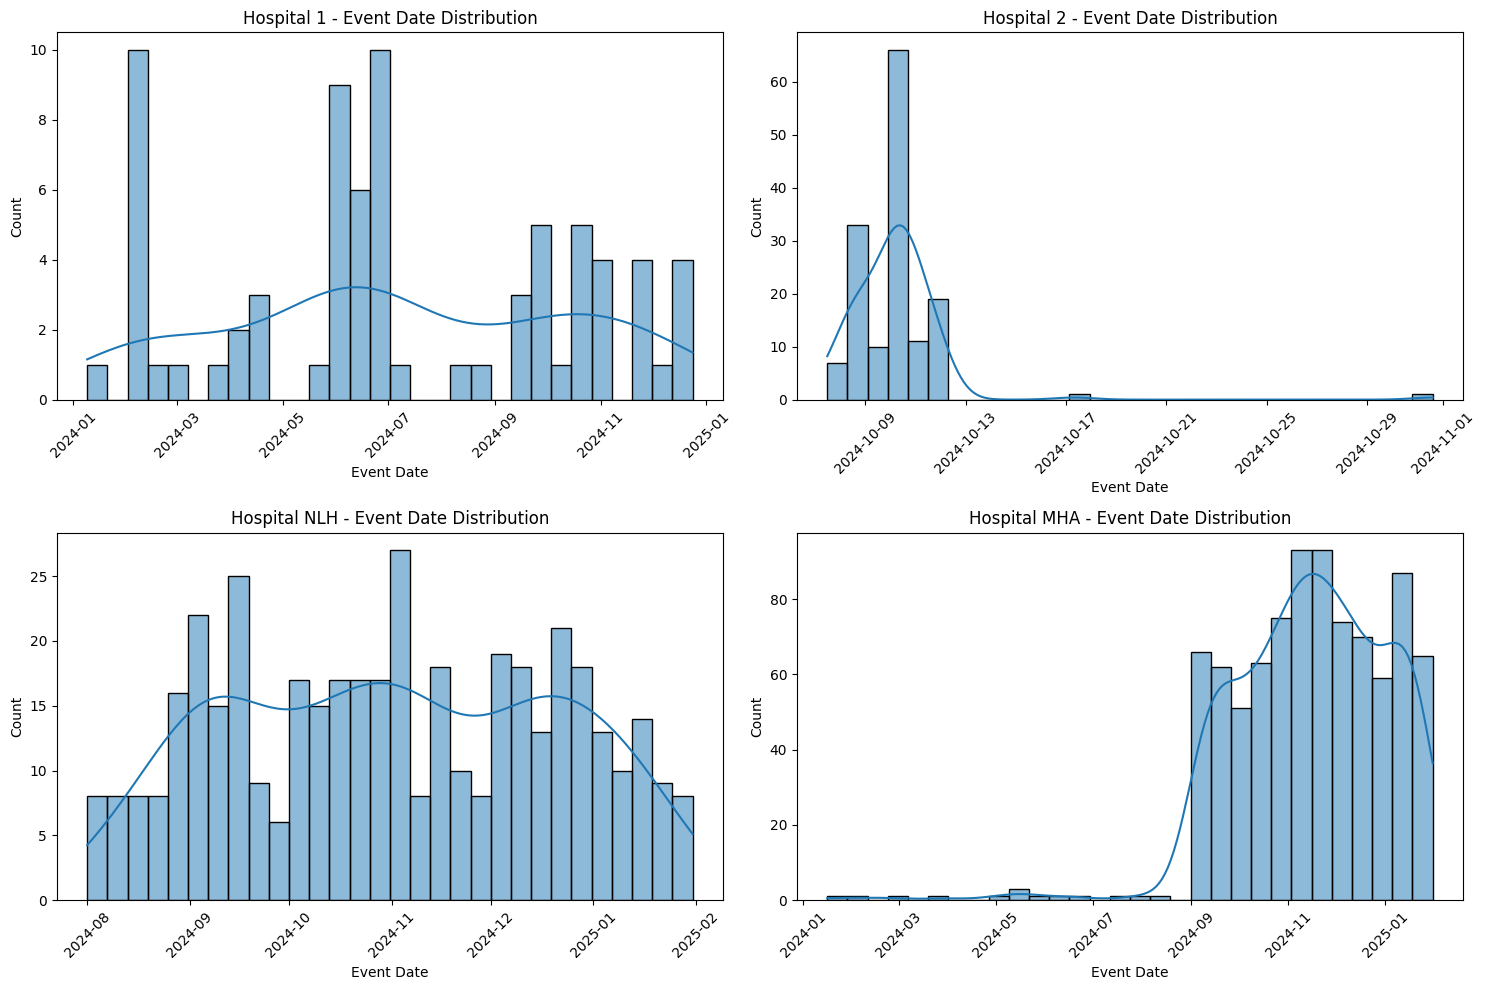

In [17]:
# Draw date distribution for each hospital as subplots
# Histogram
plt.figure(figsize=(15, 10))
for i, hosp in enumerate(hospitals, 1):
    plt.subplot(2, 2, i)
    sns.histplot(dfs[hosp]['Event Date'], bins=30, kde=True)
    plt.title(f'Hospital {hosp} - Event Date Distribution')
    plt.xlabel('Event Date')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

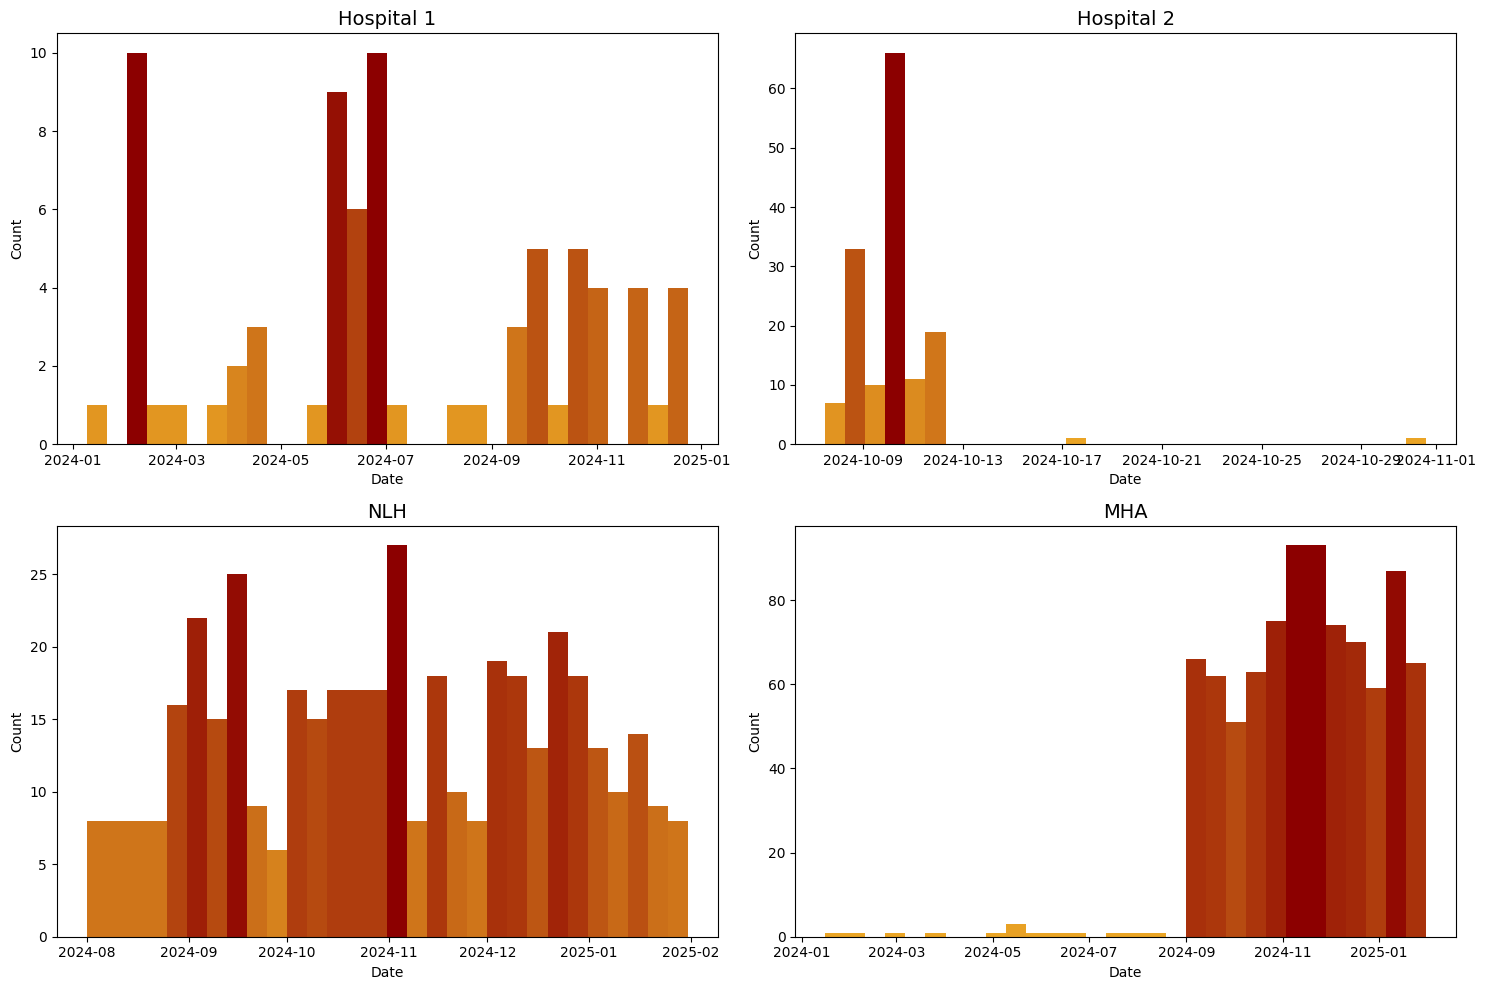

In [35]:
# Histogram with gradient
plt.figure(figsize=(15, 10))
gradient = LinearSegmentedColormap.from_list('gr', ["#EBA625", "#8C0000"])

for i, hosp in enumerate(hospitals, 1):
    plt.subplot(2, 2, i)
    n, bins, patches = plt.hist(dfs[hosp]['Event Date'], bins=30)

    # Apply gradient color to bars
    for patch, val in zip(patches, n):
        patch.set_facecolor(gradient(val / max(n)))

    if (hosp == '1' or hosp == '2'):
      plt.title(f'Hospital {hosp}', fontsize=14)
    else:
      plt.title(f'{hosp}', fontsize=14)
    plt.xlabel('Date')
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

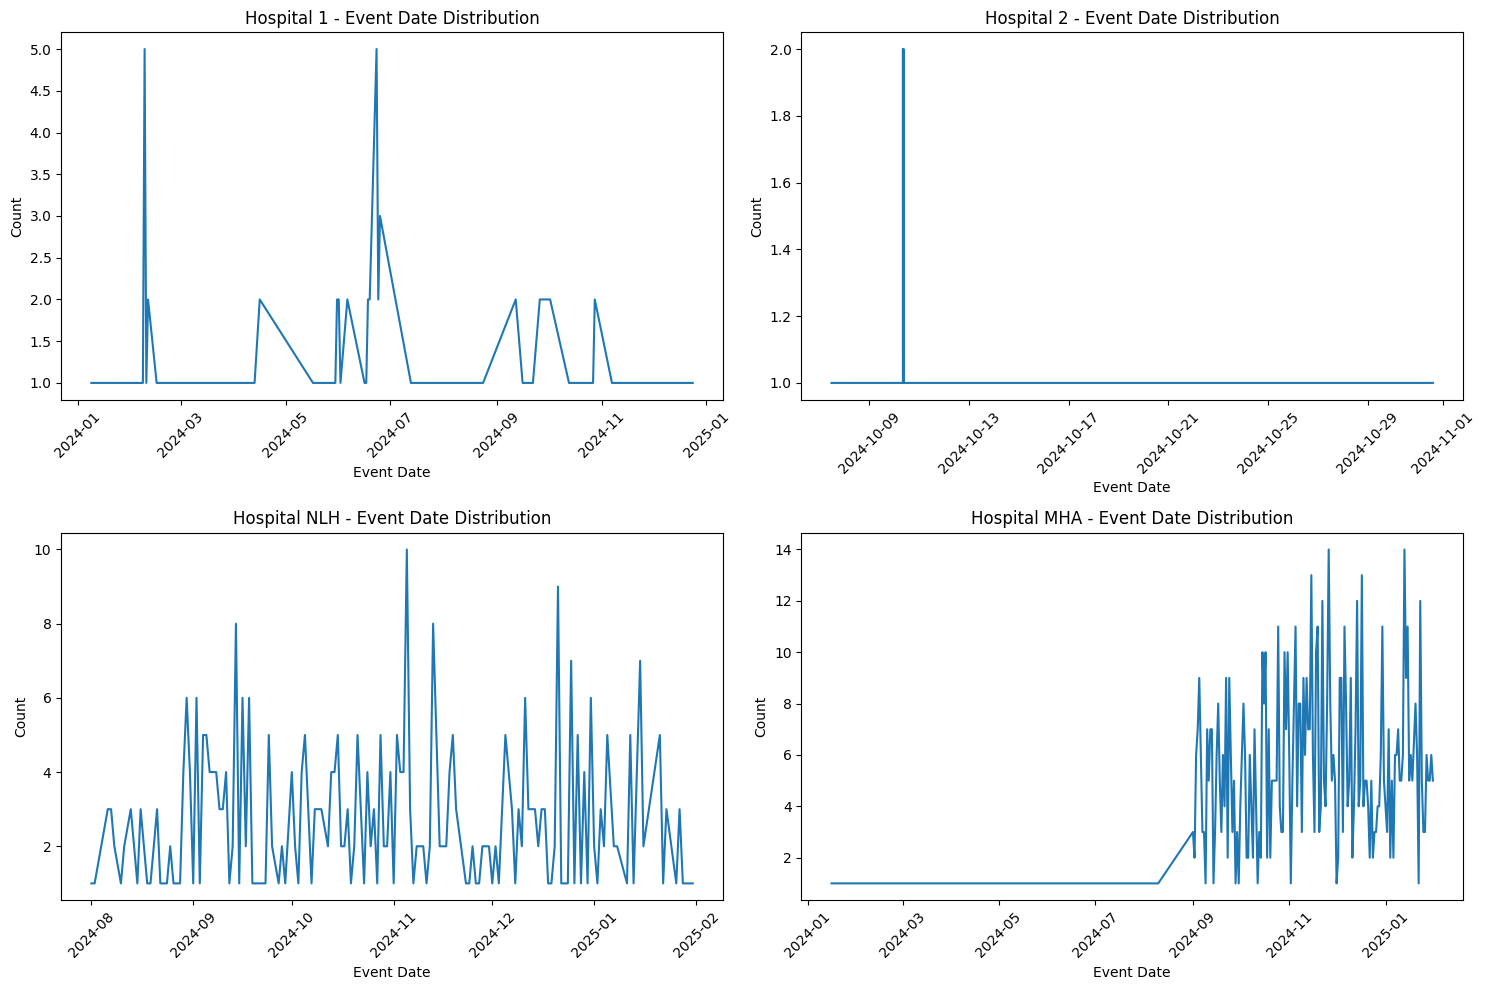

In [18]:
# Line Plot
plt.figure(figsize=(15, 10))
for i, hosp in enumerate(hospitals, 1):
    plt.subplot(2, 2, i)

    # Get value counts of dates and sort by date
    date_counts = dfs[hosp]['Event Date'].value_counts().sort_index()

    sns.lineplot(x=date_counts.index, y=date_counts.values)
    plt.title(f'Hospital {hosp} - Event Date Distribution')
    plt.xlabel('Event Date')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Overall Date Distribution

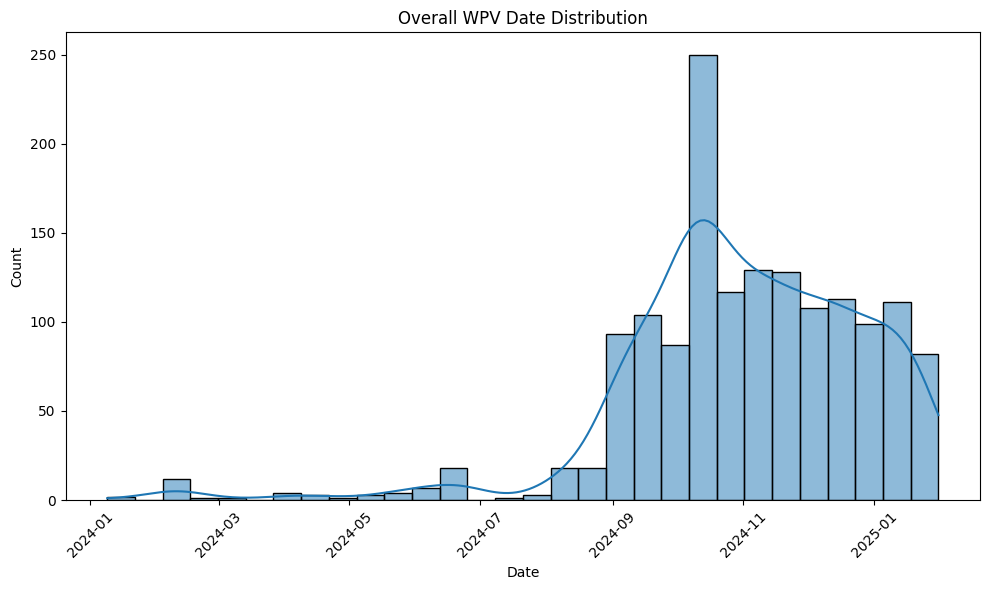

In [56]:
all_dates = pd.concat([df[['Event Date']] for df in dfs.values()])

plt.figure(figsize=(10, 6))
sns.histplot(all_dates['Event Date'], bins=30, kde=True)
plt.title('Overall WPV Date Distribution')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Date vs Weekday

##### For Overall

In [84]:
# Define the proper ordering for weekdays and months
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

<ipython-input-85-382365213f4a>:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = all_dates.pivot_table(


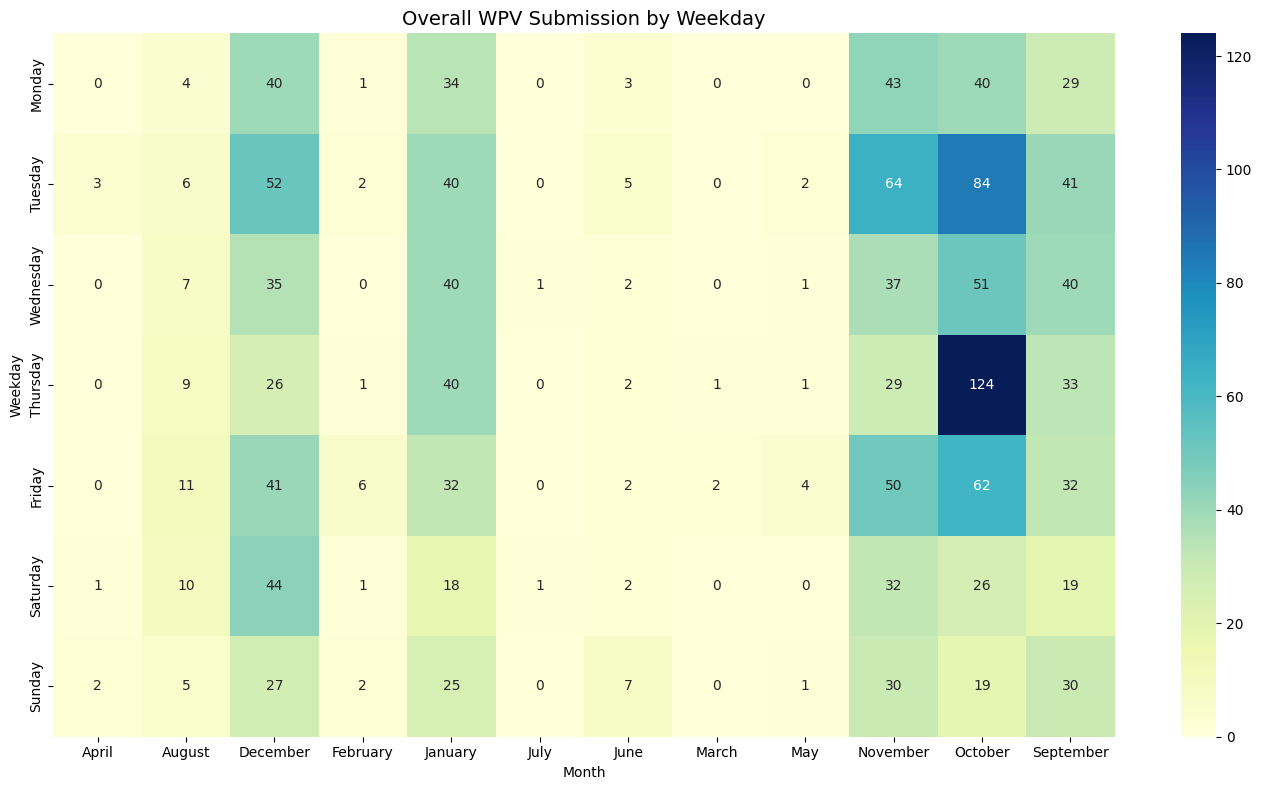

In [85]:
all_dates['Month'] = all_dates['Event Date'].dt.month_name()

heatmap_data = all_dates.pivot_table(
    index='Weekday',
    columns='Month',
    aggfunc='size',
    fill_value=0
)

plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt="d")
plt.title('Overall WPV Submission by Weekday', fontsize=14)
plt.tight_layout()
plt.show()

<ipython-input-86-e437ea8c2fda>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


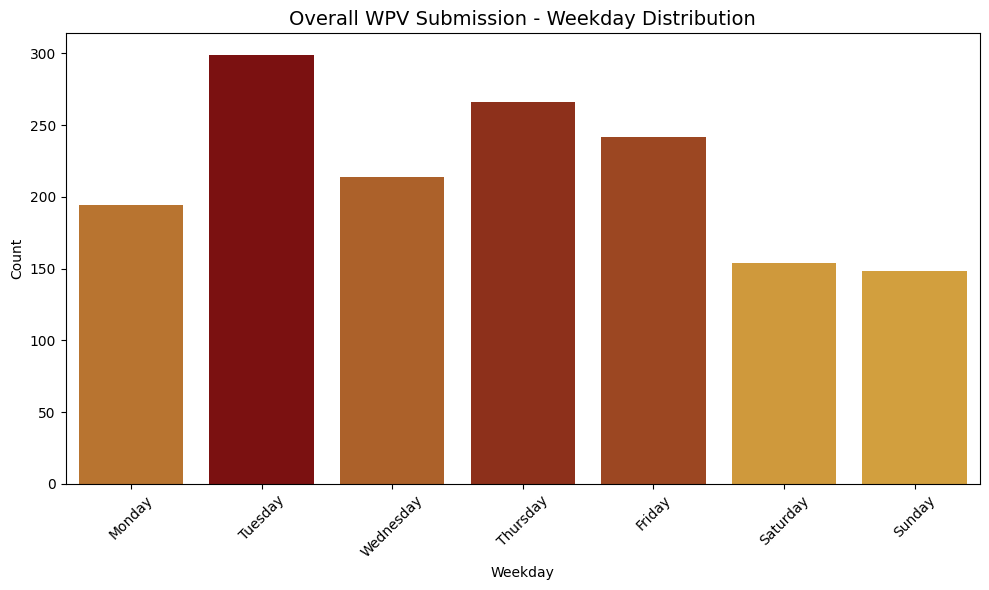

In [86]:
plt.figure(figsize=(10, 6))
gradient = LinearSegmentedColormap.from_list('gr', ["#EBA625", "#8C0000"])

# Calculate counts for each weekday
counts = all_dates['Weekday'].value_counts().reindex(weekday_order, fill_value=0)

# Normalize counts for color mapping
norm = plt.Normalize(vmin=counts.min(), vmax=counts.max())
colors = [gradient(norm(val)) for val in counts]

# Use barplot instead of countplot
sns.barplot(
    x=counts.index,
    y=counts.values,
    order=weekday_order,
    palette=colors,
)

plt.title('Overall WPV Submission - Weekday Distribution', fontsize=14)
plt.xlabel('Weekday')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

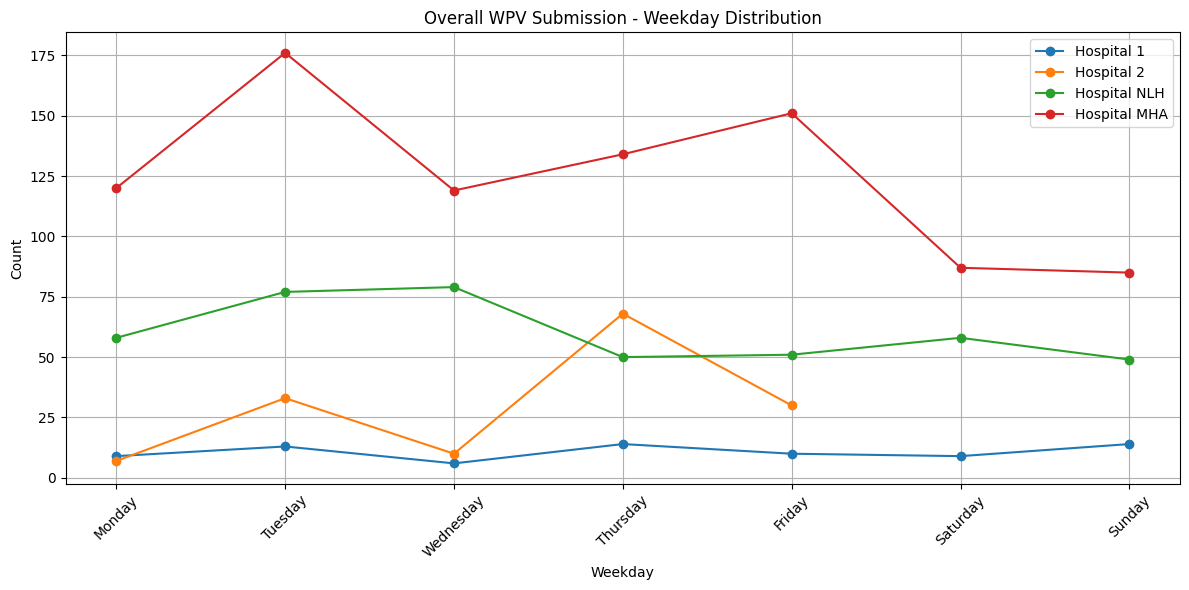

In [87]:
# Add weekday and month columns to each hospital's dataframe
for hosp in hospitals:
    df = dfs[hosp]
    df['Weekday'] = df['Event Date'].dt.day_name()
    df['Month'] = df['Event Date'].dt.month_name()

# Combined weekday distribution in one plot (for comparison)
plt.figure(figsize=(12, 6))
for hosp in hospitals:
    weekday_counts = dfs[hosp]['Weekday'].value_counts().reindex(weekday_order)
    plt.plot(weekday_order, weekday_counts, marker='o', label=f'Hospital {hosp}')

plt.title('Overall WPV Submission - Weekday Distribution')
plt.xlabel('Weekday')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### For SubPlot

In [88]:
for hosp in hospitals:
    df = dfs[hosp]
    df['Weekday'] = df['Event Date'].dt.day_name()
    df['Month'] = df['Event Date'].dt.month_name()

<ipython-input-96-aa6b75494d57>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


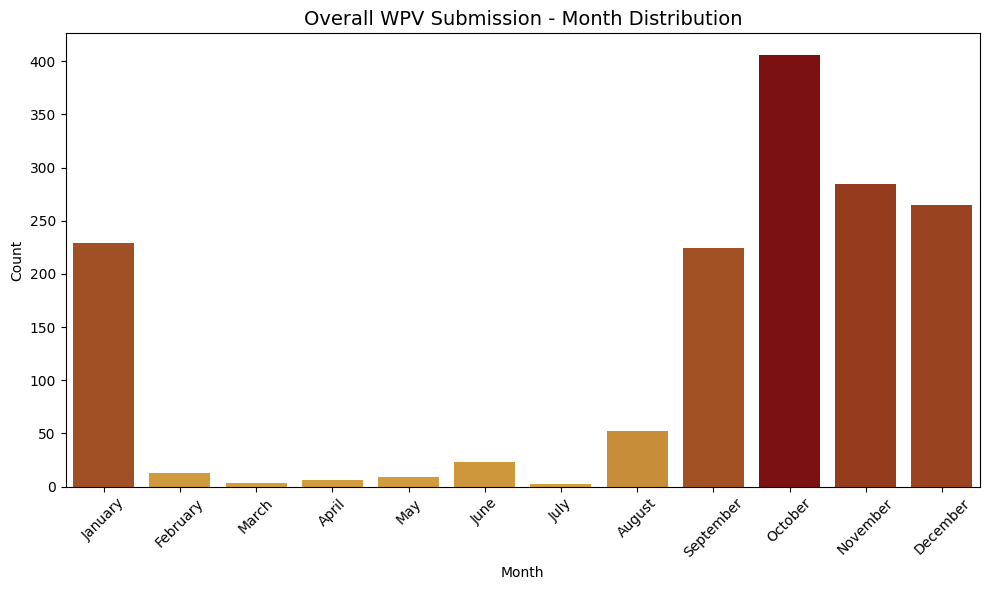

In [96]:
plt.figure(figsize=(10, 6))
gradient = LinearSegmentedColormap.from_list('gr', ["#EBA625", "#8C0000"])

# Calculate counts for each weekday
counts = all_dates['Month'].value_counts().reindex(month_order, fill_value=0)

# Normalize counts for color mapping
norm = plt.Normalize(vmin=counts.min(), vmax=counts.max())
colors = [gradient(norm(val)) for val in counts]

# Use barplot instead of countplot
sns.barplot(
    x=counts.index,
    y=counts.values,
    order=month_order,
    palette=colors,
)

plt.title('Overall WPV Submission - Month Distribution', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

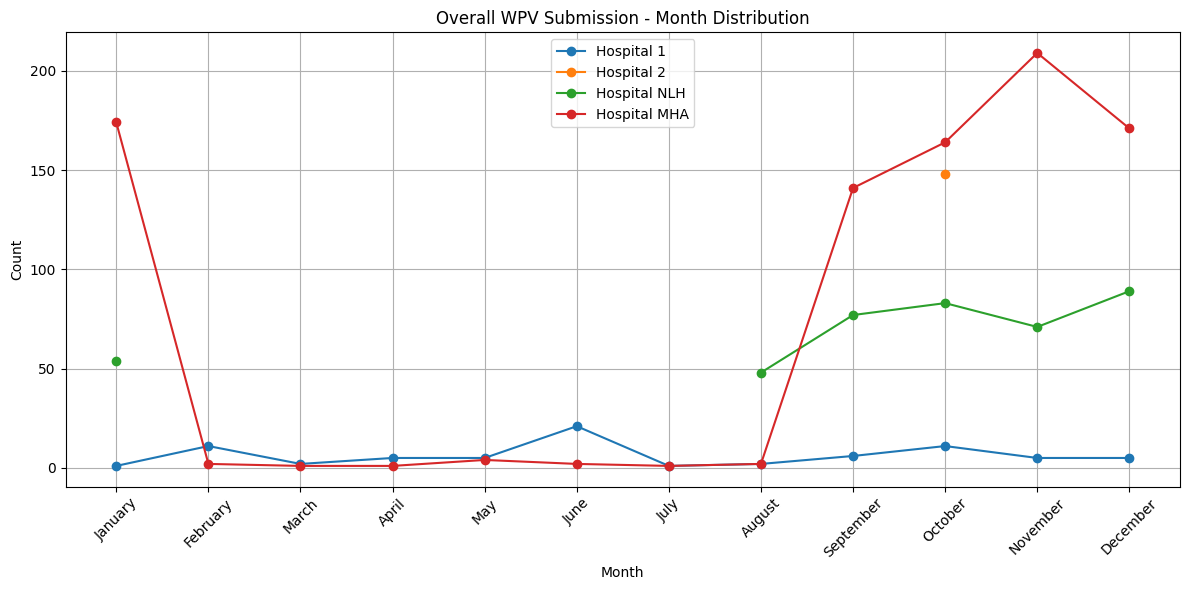

In [95]:
# Combined weekday distribution in one plot (for comparison)
plt.figure(figsize=(12, 6))
for hosp in hospitals:
    month_counts = dfs[hosp]['Month'].value_counts().reindex(month_order)
    plt.plot(month_order, month_counts, marker='o', label=f'Hospital {hosp}')

plt.title('Overall WPV Submission - Month Distribution')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-81-255745e6761e>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-81-255745e6761e>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-81-255745e6761e>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-81-255745e6761e>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


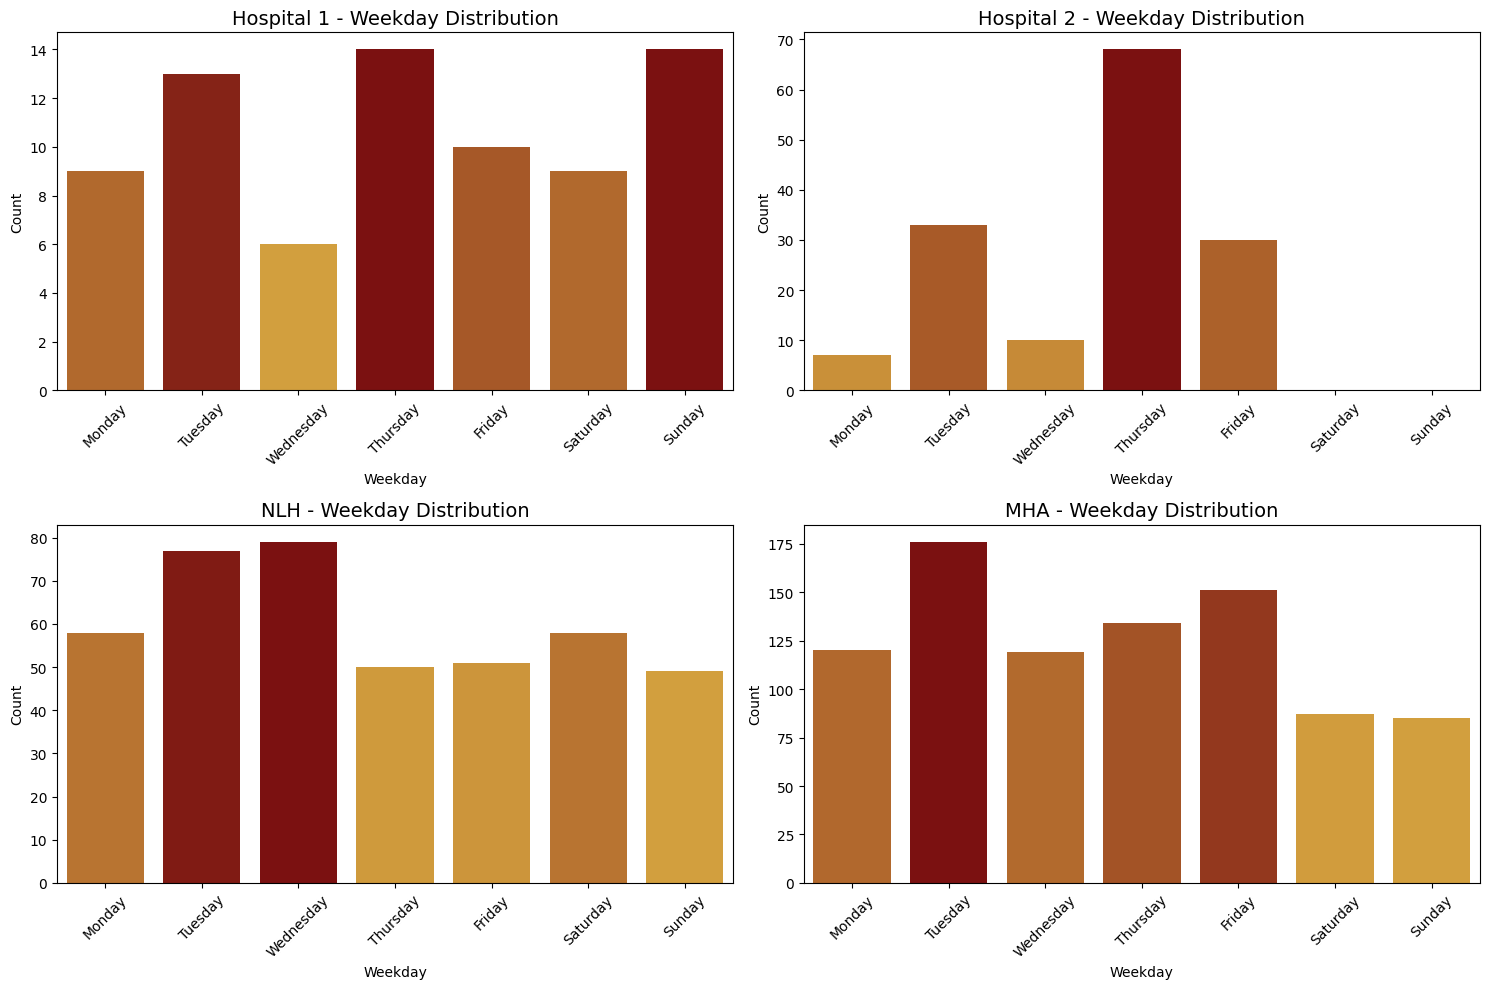

In [81]:
plt.figure(figsize=(15, 10))
gradient = LinearSegmentedColormap.from_list('gr', ["#EBA625", "#8C0000"])

for i, hosp in enumerate(hospitals, 1):
    plt.subplot(2, 2, i)
    df = dfs[hosp]

    # Calculate counts for each weekday
    counts = df['Weekday'].value_counts().reindex(weekday_order, fill_value=0)

    # Normalize counts for color mapping
    norm = plt.Normalize(vmin=counts.min(), vmax=counts.max())
    colors = [gradient(norm(val)) for val in counts]

    # Use barplot instead of countplot
    sns.barplot(
        x=counts.index,
        y=counts.values,
        order=weekday_order,
        palette=colors,
    )

    if (hosp == '1' or hosp == '2'):
        plt.title(f'Hospital {hosp} - Weekday Distribution', fontsize=14)
    else:
        plt.title(f'{hosp} - Weekday Distribution', fontsize=14)
    plt.xlabel('Weekday')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

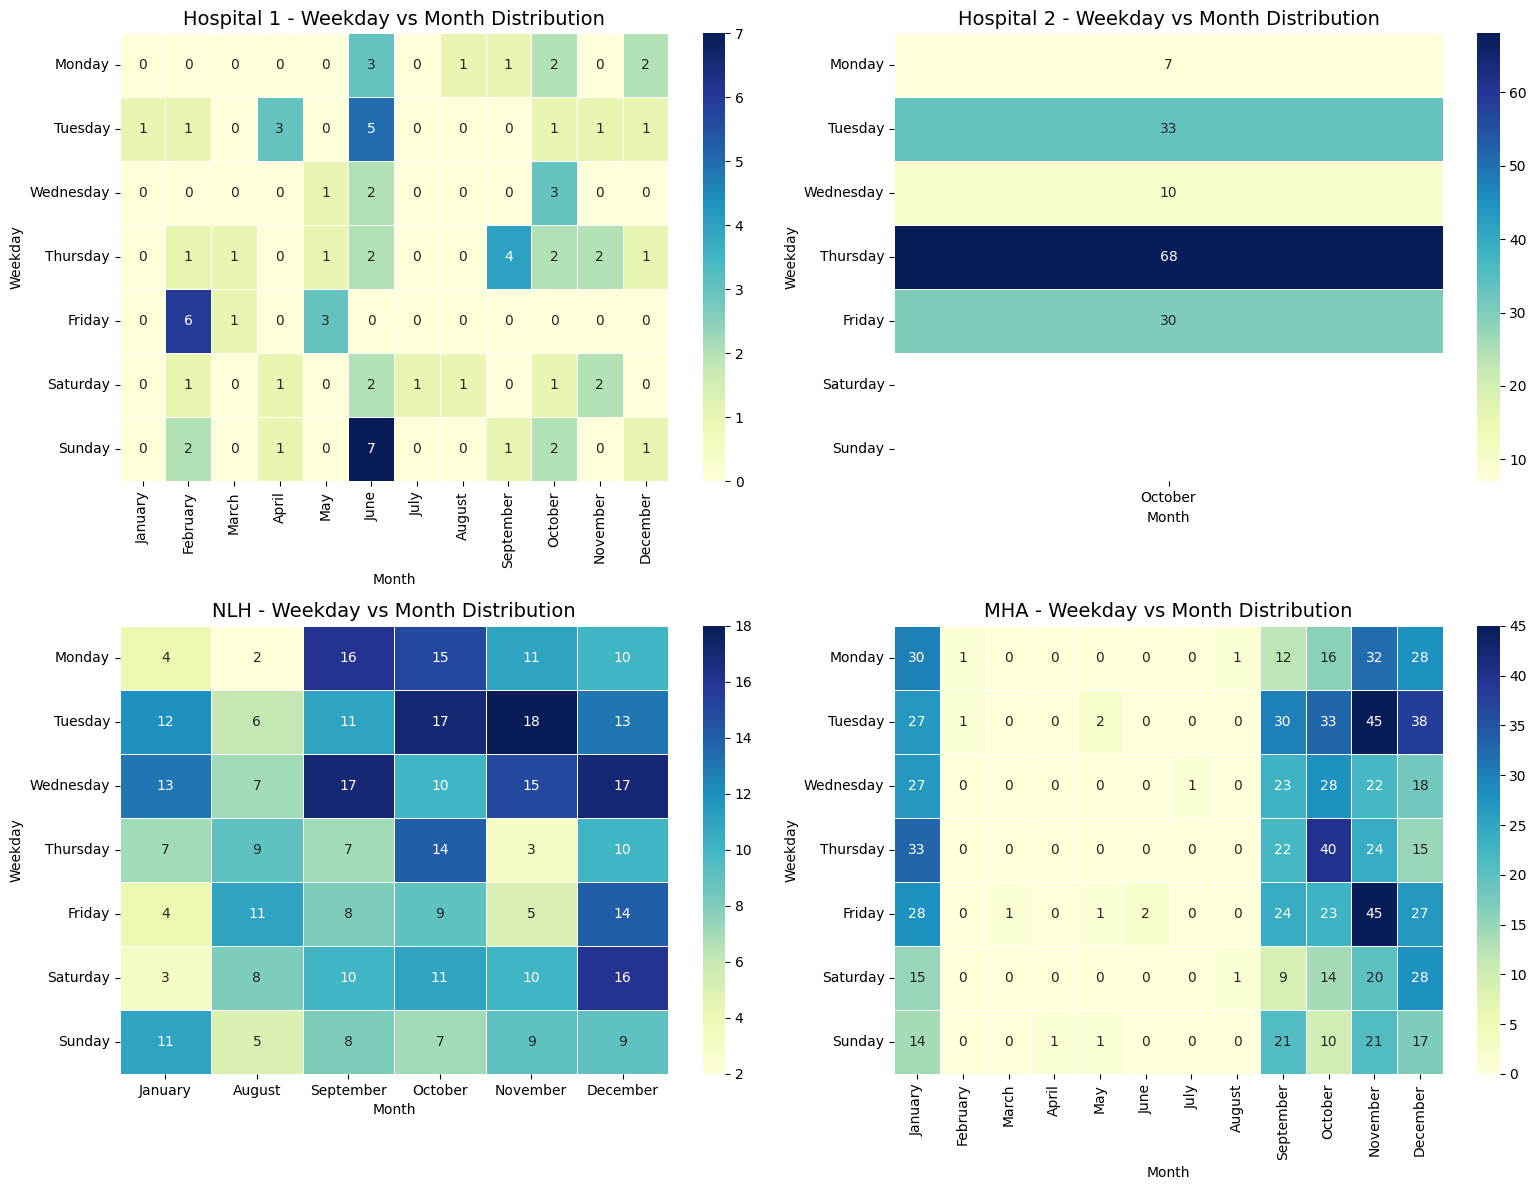

In [93]:
# Heatmap by weekday and month for each hospital
plt.figure(figsize=(16, 12))
for i, hosp in enumerate(hospitals, 1):
    plt.subplot(2, 2, i)

    # Create pivot table (ensure counts are integers)
    heatmap_data = dfs[hosp].pivot_table(
        index='Weekday',
        columns='Month',
        values='Event Date',
        aggfunc='count',  # This should return integers
        fill_value=0
    ).astype(int)  # Force conversion to integers

    # Reorder rows and columns
    heatmap_data = heatmap_data.reindex(weekday_order)
    existing_months = [m for m in month_order if m in heatmap_data.columns]
    heatmap_data = heatmap_data[existing_months]

    # Use fmt="d" since we ensured data is integer
    sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".0f", linewidths=.5)
    if (hosp == '1' or hosp == '2'):
        plt.title(f'Hospital {hosp} - Weekday vs Month Distribution', fontsize=14)
    else:
        plt.title(f'{hosp} - Weekday vs Month Distribution', fontsize=14)
    plt.xlabel('Month')
    plt.ylabel('Weekday')

plt.tight_layout()
plt.show()

#### Calendar View

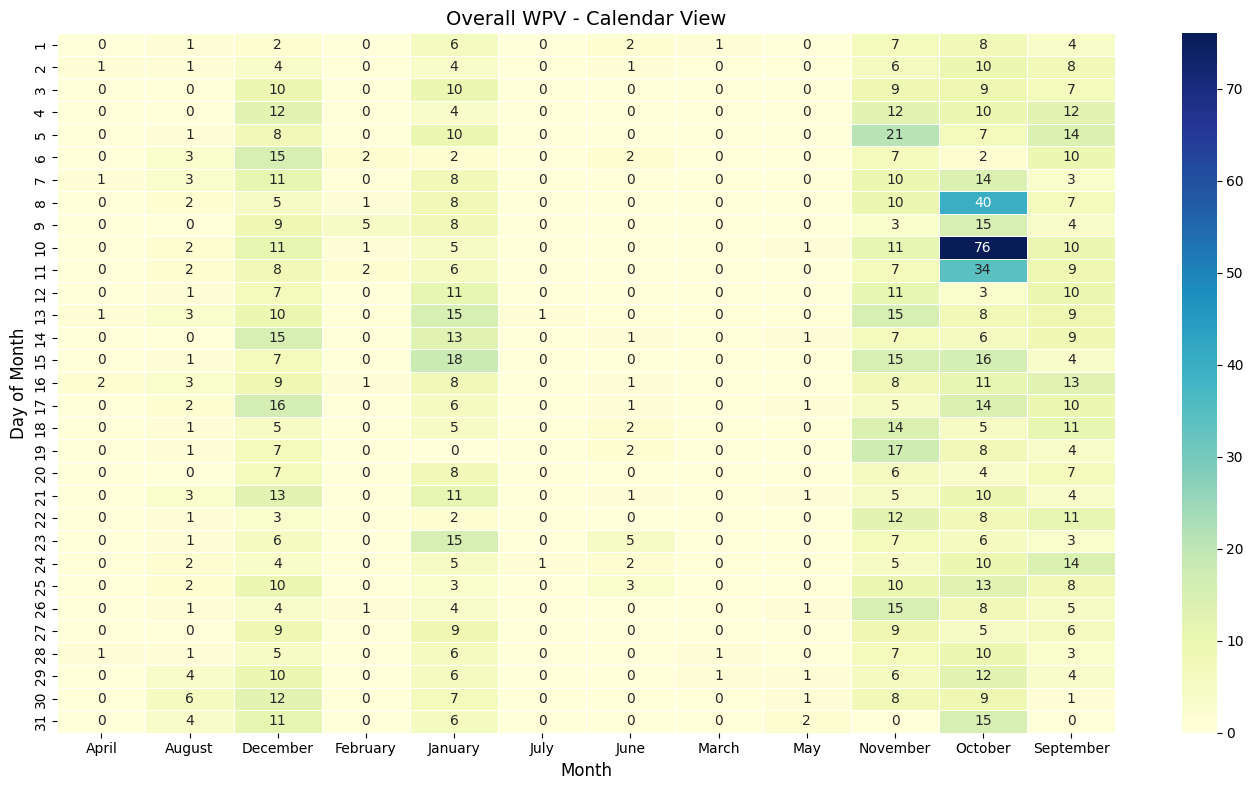

In [63]:
# Extract day and month
all_dates['Day'] = all_dates['Event Date'].dt.day
all_dates['Month'] = all_dates['Event Date'].dt.month_name()

# Define month order
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

# Pivot table for heatmap
heatmap_data = all_dates.pivot_table(
    index='Day',
    columns='Month',
    aggfunc='size',
    fill_value=0
)

# Plot
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu", linewidths=0.5, annot=True, fmt="d")
plt.title('Overall WPV - Calendar View', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Day of Month', fontsize=12)
plt.tight_layout()
plt.show()

### Time Distribution

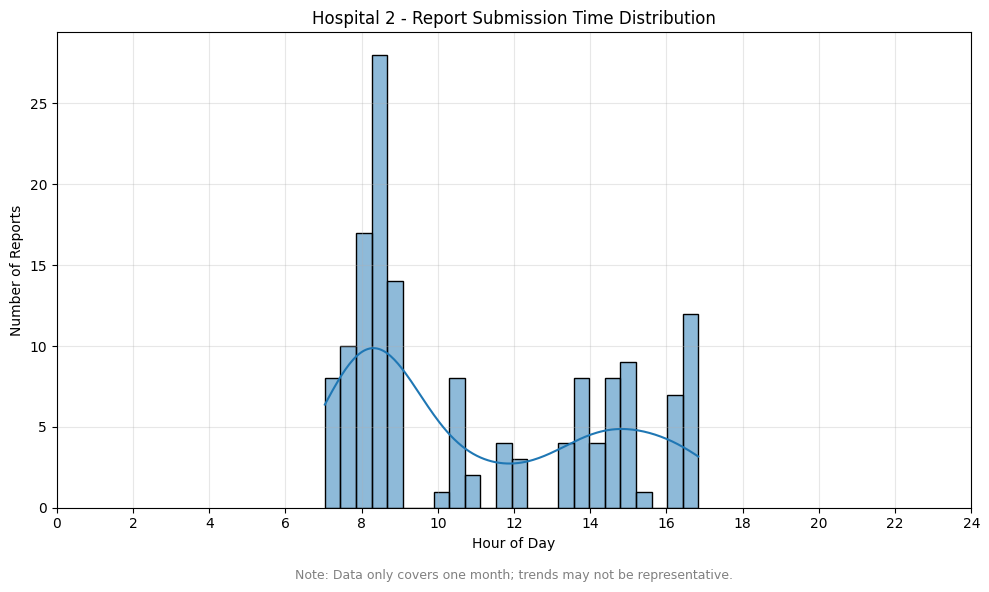

In [41]:
# One of the given dataset provides specific timeslots when users start to fill the report, which can be used to infer event time
# This comes from only 1-month record, which is less reliable though.
if '2' in dfs:
    # Extract time component
    df_2 = dfs['2'].copy()
    df_2['Event Time'] = df_2['Event Date'].dt.time

    # Convert to hours for better visualization
    df_2['Hour'] = df_2['Event Date'].dt.hour + df_2['Event Date'].dt.minute/60 + df_2['Event Date'].dt.second/3600

    plt.figure(figsize=(10, 6))
    sns.histplot(df_2['Hour'], bins=24, kde=True)
    plt.title('Hospital 2 - Report Submission Time Distribution', fontsize=12)
    plt.xlabel('Hour of Day', fontsize=10)
    plt.ylabel('Number of Reports', fontsize=10)
    plt.xticks(range(0, 25, 2))
    plt.xlim(0, 24)
    plt.grid(True, alpha=0.3)

    # Add disclaimer about limited data
    plt.annotate(
        "Note: Data only covers one month; trends may not be representative.",
        xy=(0.5, -0.15), xycoords="axes fraction",
        ha="center", fontsize=9, color="gray"
    )

    plt.tight_layout()
    plt.show()

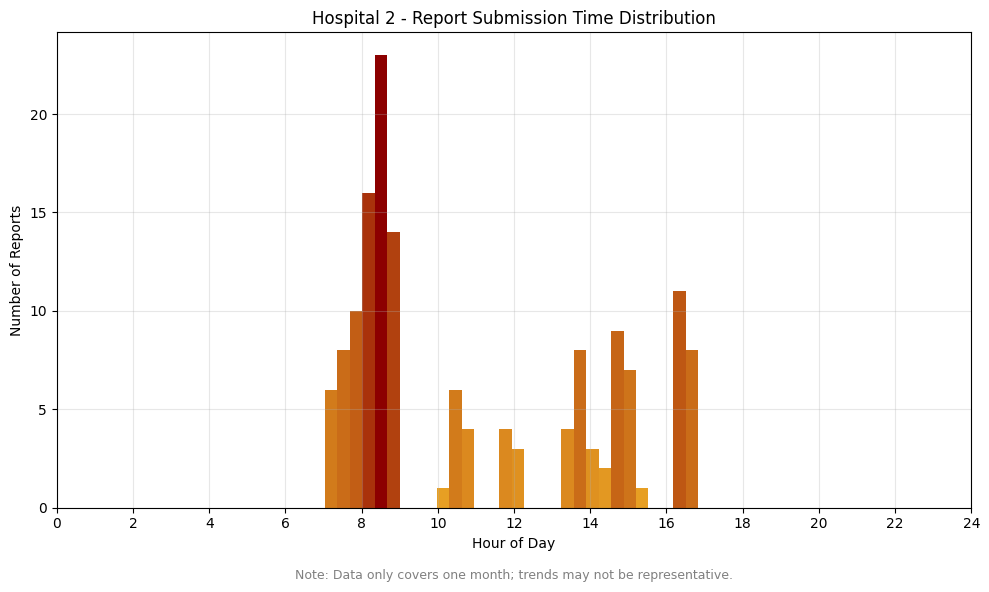

In [43]:
# Gradient Version
if '2' in dfs:
    # Extract time component
    df_2 = dfs['2'].copy()
    df_2['Event Time'] = df_2['Event Date'].dt.time

    # Convert to hours for better visualization
    df_2['Hour'] = df_2['Event Date'].dt.hour + df_2['Event Date'].dt.minute/60 + df_2['Event Date'].dt.second/3600

    plt.figure(figsize=(10, 6))
    gradient = LinearSegmentedColormap.from_list('gr', ["#EBA625", "#8C0000"])

    n, bins, patches = plt.hist(df_2['Hour'], bins=30)
    # Apply gradient color to bars
    for patch, val in zip(patches, n):
        patch.set_facecolor(gradient(val / max(n)))


    plt.title('Hospital 2 - Report Submission Time Distribution', fontsize=12)
    plt.xlabel('Hour of Day', fontsize=10)
    plt.ylabel('Number of Reports', fontsize=10)
    plt.xticks(range(0, 25, 2))
    plt.xlim(0, 24)
    plt.grid(True, alpha=0.3)

    # Add disclaimer about limited data
    plt.annotate(
        "Note: Data only covers one month; trends may not be representative.",
        xy=(0.5, -0.15), xycoords="axes fraction",
        ha="center", fontsize=9, color="gray"
    )

    plt.tight_layout()
    plt.show()

#### Time vs Weekday

<ipython-input-48-c5897af01f37>:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = df_2.pivot_table(


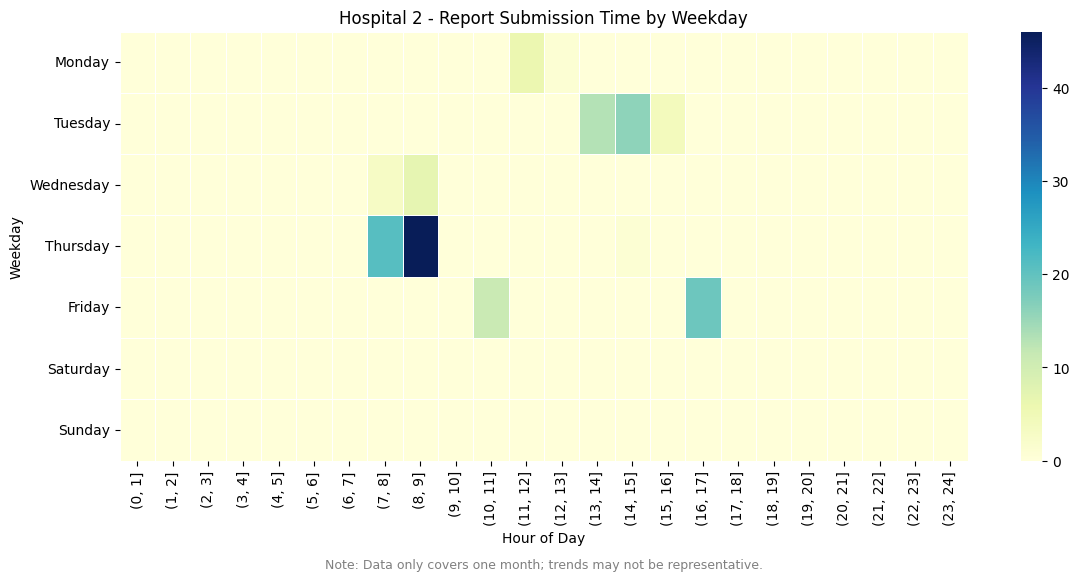

In [48]:
# Heatmap: Weekday vs. Hour
if '2' in dfs:
    df_2 = dfs['2'].copy()

    # Extract time and weekday
    df_2['Report Time'] = df_2['Event Date'].dt.time
    df_2['Hour'] = df_2['Event Date'].dt.hour + df_2['Event Date'].dt.minute/60 + df_2['Event Date'].dt.second/3600
    df_2['Weekday'] = df_2['Event Date'].dt.day_name()  # Monday, Tuesday, etc.

    # --- Weekday vs. Hour (Heatmap) ---
    weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    df_2['Weekday'] = pd.Categorical(df_2['Weekday'], categories=weekday_order, ordered=True)

    # Pivot table for heatmap
    heatmap_data = df_2.pivot_table(
        index='Weekday',
        columns=pd.cut(df_2['Hour'], bins=range(0, 25, 1)),
        aggfunc='size',
        fill_value=0
    )

    plt.figure(figsize=(12, 6))
    sns.heatmap(heatmap_data, cmap="YlGnBu", linewidths=0.5)
    plt.title('Hospital 2 - Report Submission Time by Weekday', fontsize=12)
    plt.xlabel('Hour of Day', fontsize=10)
    plt.ylabel('Weekday', fontsize=10)
    plt.annotate(
        "Note: Data only covers one month; trends may not be representative.",
        xy=(0.5, -0.25), xycoords="axes fraction",
        ha="center", fontsize=9, color="gray"
    )
    plt.tight_layout()
    plt.show()

### Luna

In [99]:
!pip install ephem

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 44.1 MB/s eta 0:00:00


In [100]:
# Function to get moon phase (requires ephem package)
import ephem

def get_moon_phase(date):
    date = ephem.Date(date)
    nnm = ephem.next_new_moon(date)
    pnm = ephem.previous_new_moon(date)
    lunation = (date - pnm) / (nnm - pnm)
    return lunation

In [101]:
# Apply to each date
all_dates['Moon Phase'] = all_dates['Event Date'].apply(lambda x: get_moon_phase(x))

# Create full moon indicator (phase between 0.9 and 1.1)
all_dates['Full Moon'] = all_dates['Moon Phase'].between(0.9, 1.1).astype(int)

In [102]:
all_dates.head()

,Event Date,Weekday,Hour,Month,Day,Moon Phase,Full Moon
0,2024-01-09,Tuesday,0,January,9,0.915367,1
1,2024-02-06,Tuesday,0,February,6,0.865656,0
2,2024-02-09,Friday,0,February,9,0.967490,1
3,2024-02-08,Thursday,0,February,8,0.933545,1
4,2024-02-09,Friday,0,February,9,0.967490,1


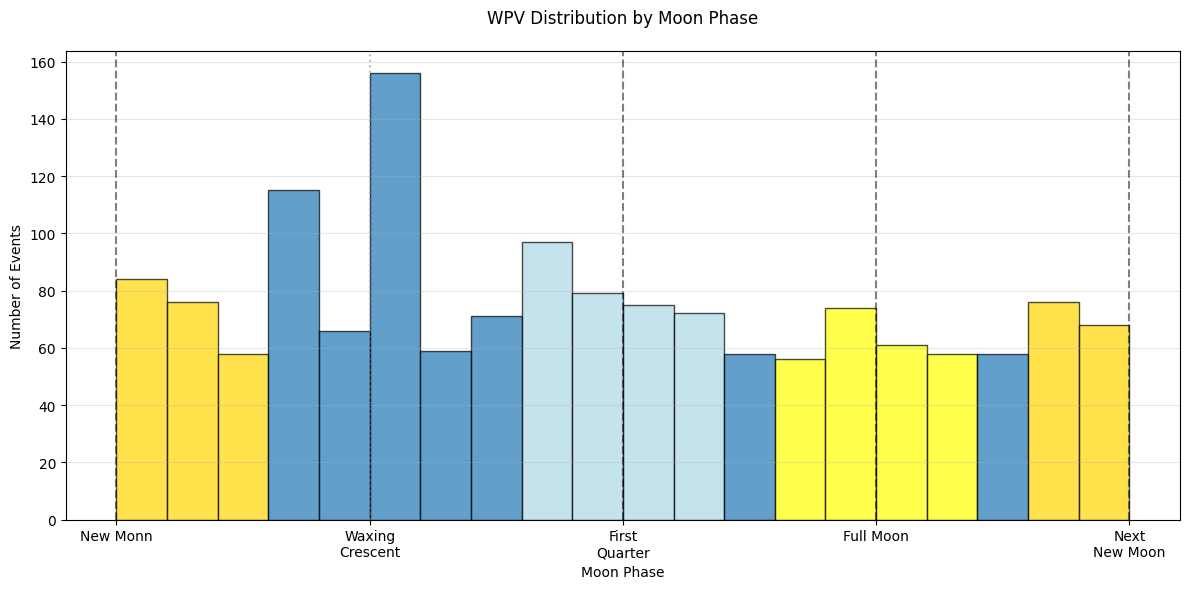

In [109]:
plt.figure(figsize=(12, 6))

# Create bins - using more bins for better resolution
bins = np.linspace(0, 1, 21)  # 20 bins for better granularity

# Plot histogram
n, bins, patches = plt.hist(all_dates['Moon Phase'], bins=bins,
                            edgecolor='black', alpha=0.7)

# Customize colors to represent moon phases
for i in range(len(patches)):
    if bins[i] >= 0.9 or bins[i] <= 0.1:  # New Moon (0) and near Full Moon (1)
        patches[i].set_facecolor('gold')
    elif 0.4 <= bins[i] <= 0.6:  # First Quarter
        patches[i].set_facecolor('lightblue')
    elif 0.65 <= bins[i] <= 0.85:  # Full Moon (approximately)
        patches[i].set_facecolor('yellow')

# Add vertical lines for key phases
plt.axvline(0, color='black', linestyle='--', alpha=0.5, label='New Moon')
plt.axvline(0.25, color='gray', linestyle=':', alpha=0.5)
plt.axvline(0.5, color='black', linestyle='--', alpha=0.5, label='First Quarter')
plt.axvline(0.75, color='black', linestyle='--', alpha=0.5, label='Full Moon')
plt.axvline(1, color='black', linestyle='--', alpha=0.5)

# Add labels and title
plt.title('WPV Distribution by Moon Phase', pad=20)
# 0 = New Moon, 0.5 = First Quarter, 0.75 = Full Moon, 1 = Next New Moon
plt.xlabel('Moon Phase')
plt.ylabel('Number of Events')
plt.xticks([0, 0.25, 0.5, 0.75, 1],
           ['New Monn', 'Waxing\nCrescent', 'First\nQuarter', 'Full Moon', 'Next\nNew Moon'])

# Add legend and grid
# plt.legend()
plt.grid(axis='y', alpha=0.3)

# Show plot
plt.tight_layout()
plt.show()

### Temp & Rain

In [140]:
import pandas as pd
import requests
from concurrent.futures import ThreadPoolExecutor
from functools import lru_cache
import time
from datetime import datetime
import re

In [141]:
def clean_date(date_input):
    """Convert various date formats to YYYY-MM-DD"""
    if pd.isna(date_input):
        return None

    date_str = str(date_input).strip()

    try:
        # Handle already properly formatted dates (YYYY-MM-DD)
        if re.match(r'^\d{4}-\d{2}-\d{2}$', date_str):
            return date_str

        # Handle datetime strings like "10/9/2024 8:19"
        if ' ' in date_str:
            date_str = date_str.split()[0]

        # Handle US format (MM/DD/YYYY)
        if re.match(r'^\d{1,2}/\d{1,2}/\d{4}$', date_str):
            return datetime.strptime(date_str, '%m/%d/%Y').strftime('%Y-%m-%d')

        # Handle ISO format (YYYY-MM-DD) with possible timestamp
        if 'T' in date_str:
            return date_str.split('T')[0]

        # Try automatic parsing as last resort
        return pd.to_datetime(date_str).strftime('%Y-%m-%d')

    except Exception as e:
        print(f"Warning: Could not parse date {date_input} (Error: {str(e)})")
        return None

In [142]:
@lru_cache(maxsize=1000)
def get_weather_for_date(date_str):
    """Get weather data with robust date handling"""
    clean_date_str = clean_date(date_str)
    if not clean_date_str:
        return None

    lat, lon = 42.36, -71.06  # Boston

    try:
        # Determine API endpoint
        today = datetime.now().strftime('%Y-%m-%d')
        base_url = "https://api.open-meteo.com/v1/forecast" if clean_date_str > today else "https://archive-api.open-meteo.com/v1/archive"

        params = {
            'latitude': lat,
            'longitude': lon,
            'start_date': clean_date_str,
            'end_date': clean_date_str,
            'daily': 'temperature_2m_max,temperature_2m_min,precipitation_sum',
            'temperature_unit': 'fahrenheit',
            'timezone': 'America/New_York'
        }

        response = requests.get(base_url, params=params, timeout=10)
        response.raise_for_status()
        data = response.json()['daily']

        return {
            'date': clean_date_str,
            'max_temp': data['temperature_2m_max'][0],
            'min_temp': data['temperature_2m_min'][0],
            'precip': data['precipitation_sum'][0]
        }

    except Exception as e:
        print(f"Error processing {date_str} (as {clean_date_str}): {str(e)}")
        return None

def add_weather_data(df, date_column='Event Date', max_workers=5):
    """Process DataFrame with parallel requests"""
    # Convert all dates to clean format first
    df['_clean_date'] = df[date_column].apply(clean_date)

    # Process unique dates in parallel
    unique_dates = [d for d in df['_clean_date'].unique() if d is not None]

    with ThreadPoolExecutor(max_workers=max_workers) as executor:
        weather_data = {}
        for date, result in zip(unique_dates, executor.map(get_weather_for_date, unique_dates)):
            weather_data[date] = result
            time.sleep(0.2)  # Rate limiting

    # Map results back to original rows
    df['Temperature_MAX'] = df['_clean_date'].map(lambda x: weather_data.get(x, {}).get('max_temp'))
    df['Temperature_MIN'] = df['_clean_date'].map(lambda x: weather_data.get(x, {}).get('min_temp'))
    df['Precipitation'] = df['_clean_date'].map(lambda x: weather_data.get(x, {}).get('precip'))

    # Clean up
    df.drop('_clean_date', axis=1, inplace=True)
    return df

In [143]:
all_dates = add_weather_data(all_dates)

In [144]:
all_dates['temperature'] = (all_dates['Temperature_MAX'] + all_dates['Temperature_MIN']) / 2

In [145]:
all_dates.head()

,Event Date,Weekday,Hour,Month,Day,Moon Phase,Full Moon,Temperature_MAX,Temperature_MIN,Precipitation,temperature
0,2024-01-09,Tuesday,0,January,9,0.915367,1,40.4,10.6,8.3,25.50
1,2024-02-06,Tuesday,0,February,6,0.865656,0,38.1,25.0,0.0,31.55
2,2024-02-09,Friday,0,February,9,0.967490,1,47.6,28.7,0.0,38.15
3,2024-02-08,Thursday,0,February,8,0.933545,1,43.5,24.6,0.0,34.05
4,2024-02-09,Friday,0,February,9,0.967490,1,47.6,28.7,0.0,38.15


#### Temperature

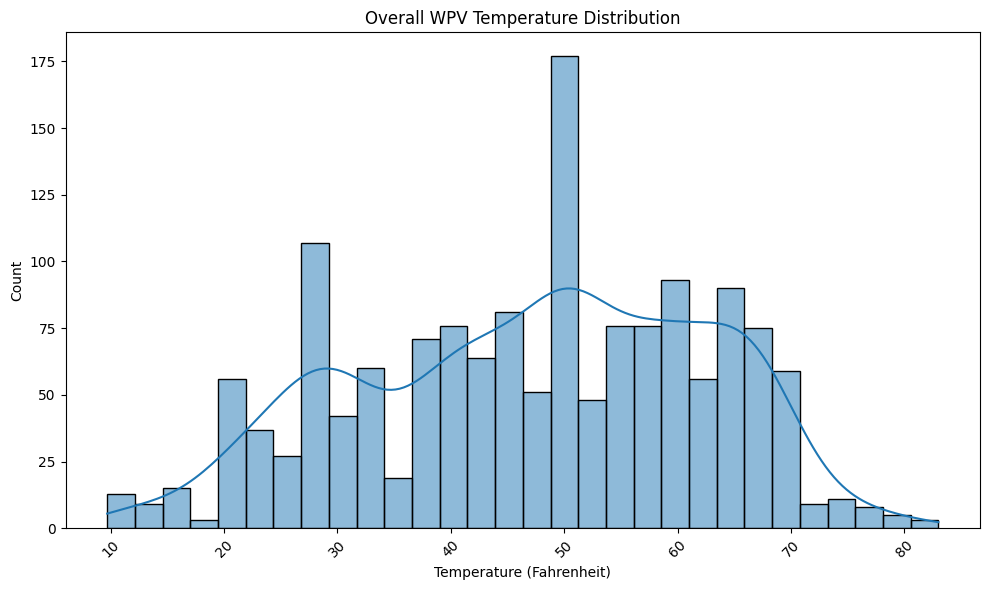

In [147]:
plt.figure(figsize=(10, 6))
sns.histplot(all_dates['temperature'], bins=30, kde=True)
plt.title('Overall WPV Temperature Distribution')
plt.xlabel('Temperature (Fahrenheit)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

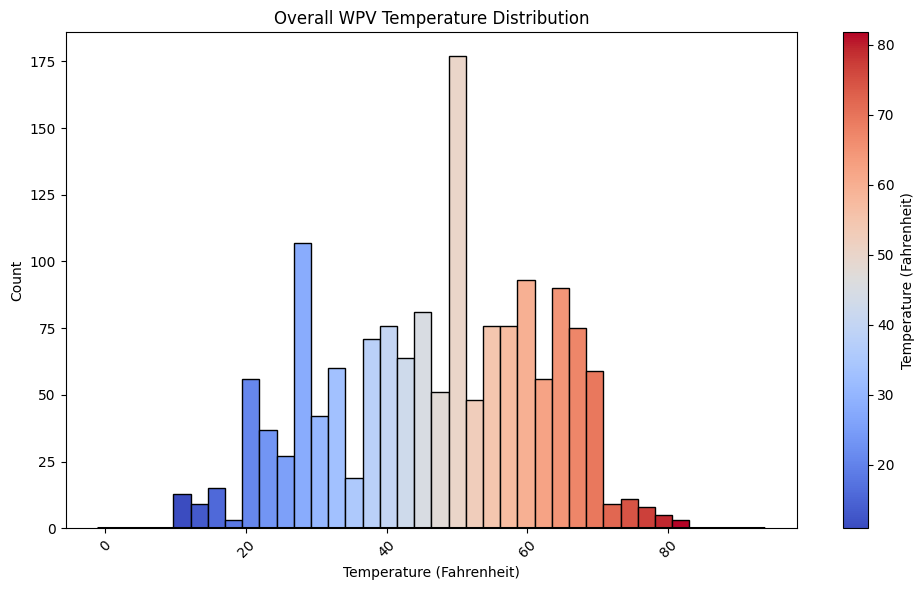

In [150]:
plt.figure(figsize=(10, 6))

# Create histogram with temperature-based coloring
n, bins, patches = plt.hist(all_dates['temperature'], bins=30, edgecolor='black')

# Color each bar according to its temperature value
cmap = plt.get_cmap('coolwarm')
bin_centers = 0.5 * (bins[:-1] + bins[1:])
col = (bin_centers - min(bin_centers)) / (max(bin_centers) - min(bin_centers))
for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cmap(c))

# Create a new axis for the colorbar
ax = plt.gca()  # Get current axis

# Add KDE plot on the same axis
sns.kdeplot(all_dates['temperature'], color='black', linewidth=2, ax=ax)

# Create scalar mappable for colorbar
norm = plt.Normalize(min(bin_centers), max(bin_centers))
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

# Add colorbar to the figure
plt.colorbar(sm, ax=ax, label='Temperature (Fahrenheit)')

plt.title('Overall WPV Temperature Distribution')
plt.xlabel('Temperature (Fahrenheit)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Precipitation

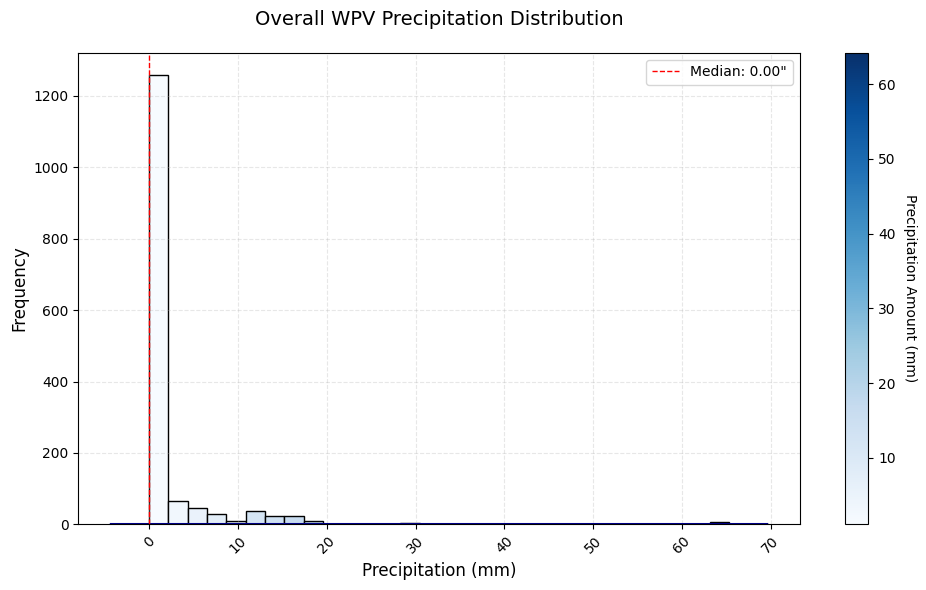

In [153]:
plt.figure(figsize=(10, 6))

# Create histogram with precipitation-based coloring
n, bins, patches = plt.hist(all_dates['Precipitation'], bins=30, edgecolor='black')

# Use a precipitation-appropriate colormap (blues or sequential)
cmap = plt.get_cmap('Blues')  # Alternatives: 'YlGnBu', 'GnBu', 'PuBu'
bin_centers = 0.5 * (bins[:-1] + bins[1:])
col = (bin_centers - min(bin_centers)) / (max(bin_centers) - min(bin_centers))
for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cmap(c))

# Create axis reference
ax = plt.gca()

# Add KDE plot
sns.kdeplot(all_dates['Precipitation'], color='darkblue', linewidth=2, ax=ax)

# Create and add colorbar
norm = plt.Normalize(min(bin_centers), max(bin_centers))
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Precipitation Amount (mm)', rotation=270, labelpad=15)

# Customize appearance
plt.title('Overall WPV Precipitation Distribution', fontsize=14, pad=20)
plt.xlabel('Precipitation (mm)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.3)

# Highlight dry vs wet conditions
ax.axvline(x=np.median(all_dates['Precipitation']),
           color='red', linestyle='--', linewidth=1,
           label=f'Median: {np.median(all_dates["Precipitation"]):.2f}"')
plt.legend()

plt.tight_layout()
plt.show()